# Desalination Plant Failure Analysis Using Time Series Analysis/Regression

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

# Set style, color, and figure size
sns.set(font_scale=1.5)
sns.set_style('white', rc={'patch.force_edgecolor':True,'patch.edgecolor': 'black'})
sns.set_palette(sns.color_palette('tab10'))

---------------------------------------------------------------------------

### Step 2: <span style="color:green">Descriptive Statistics</span> 

i. Import each of the three separate files and merge them into one dataframe.

ii. Print descriptive statistics on the combined dataframe using **.describe()** and **.info()**

iii. Set "TIMEFRAME" as the index on the combined dataframe. 

In [2]:
# Importing csv files into Jupyter
dataframe_1 = pd.read_csv('Desalination_Unit_File_001.csv', parse_dates=True, header=1)
dataframe_2 = pd.read_csv('Desalination_Unit_File_002.csv', parse_dates=True, header=1)
dataframe_3 = pd.read_csv('Desalination_Unit_File_003.csv', parse_dates=True, header=1)
combine = [dataframe_1, dataframe_2, dataframe_3]
dataframe = pd.concat(combine)
print(dataframe)

# Print descriptive statistics on combined dataframe
print(dataframe.describe())
print(dataframe.info())

      SURJEK_FLOW_METER_1  SURJEK_FLOW_METER_2  ROTATIONAL_PUMP_RPM  \
0                0.000000            -4.768066             0.000000   
1                0.000000            -4.855957             0.000000   
2                0.000000            -7.447938             0.000000   
3                0.000000            -8.745117             0.000000   
4                0.000000            -6.877441             0.000000   
...                   ...                  ...                  ...   
1997             0.533913             2.900391            -0.272157   
1998             0.533862            17.468260            -0.272227   
1999             0.533811             3.603516            -0.272296   
2000             0.533657            -4.174805            -0.272505   
2001             0.533504            -1.867676            -0.272714   

      SURJEK_PUMP_TORQUE  MAXIMUM_DAILY_PUMP_TORQUE  SURJEK_AMMONIA_FLOW_RATE  \
0               0.000000                      0.000               

In [3]:
# Set "TIMEFRAME" as index
dataframe.set_index('TIMEFRAME',inplace=True)
print(dataframe)


                     SURJEK_FLOW_METER_1  SURJEK_FLOW_METER_2  \
TIMEFRAME                                                       
9/12/14 0:00                    0.000000            -4.768066   
9/12/14 0:01                    0.000000            -4.855957   
9/12/14 0:01                    0.000000            -7.447938   
9/12/14 0:01                    0.000000            -8.745117   
9/12/14 0:02                    0.000000            -6.877441   
...                                  ...                  ...   
10/12/2014 16:52:00             0.533913             2.900391   
10/12/2014 16:52:00             0.533862            17.468260   
10/12/2014 16:52:00             0.533811             3.603516   
10/12/2014 16:52:00             0.533657            -4.174805   
10/12/2014 16:52:00             0.533504            -1.867676   

                     ROTATIONAL_PUMP_RPM  SURJEK_PUMP_TORQUE  \
TIMEFRAME                                                      
9/12/14 0:00              

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

Creating a visualization of the data using Python is often more informative than viewing the table statistics. Next up — convert the tables created into a boxplot.

Note: do any particular variables stand out to you? 

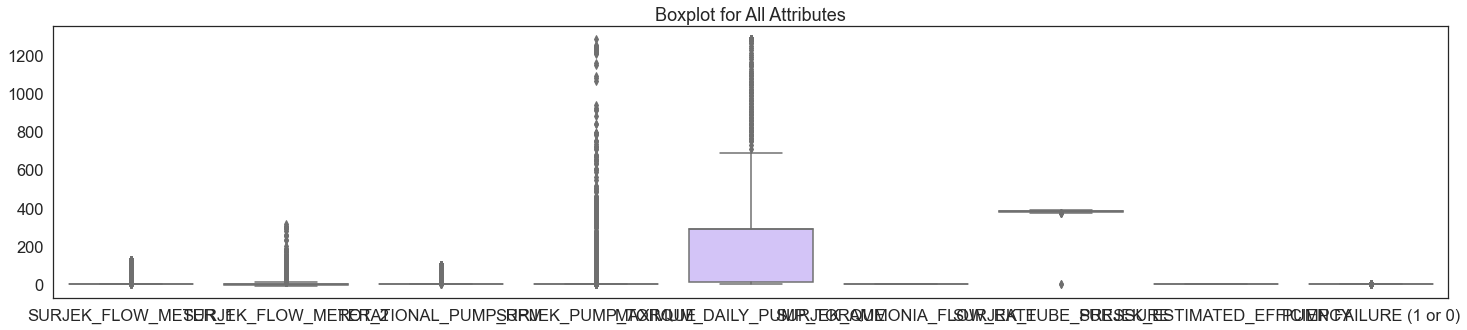

In [4]:
# Create figure size 25 x 5
plt.rcParams['figure.figsize'] = (25,5)

# Create the boxplot
bp = sns.boxplot(data=dataframe, palette='pastel')

# Set title
bp.set_title("Boxplot for All Attributes")

# Show plot
plt.show()

#### You would probably note that it might seem that some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see.
#### Perhaps, we should remove these variables and look at the box plot again?

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Create a Filtered Boxplot</span>  
i) Create the same boxplot from  step 3, but this time, filter out SURJEK_PUMP_TORQUE and MAXIMUM_DAILY_PUMP_TORQUE. Create a new dataframe and apply a filter named **'dataframe_filt'**.

**Open-ended question:**

Beyond pump torque and max daily pump torque, do any other attributes seem to 'stand out'?

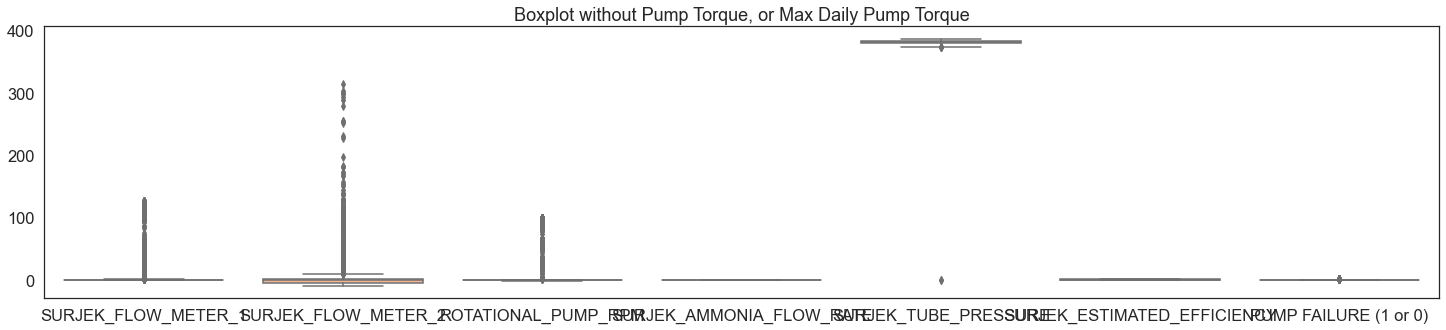

In [5]:
#Below is the first part of the code
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY', 'PUMP FAILURE (1 or 0)'] 
plt.rcParams['figure.figsize'] = (25,5)

# Filtered dataframe
df_filt = dataframe[filt]

# Filtered boxplot
bp_filt = sns.boxplot(data=df_filt, palette='pastel')

# Title boxplot and show
bp_filt = bp_filt.set_title('Boxplot without Pump Torque, or Max Daily Pump Torque')
plt.show()



---------------------------------------------------------------------------

### Step 5: <span style="color:green">Filter Boxplot by Column Value</span> 

i) Using the whole dataset, create another boxplot using the whole dataset but this time, compare the distributions for when Pump Failure is 1 (The Pump has failed) and 0 (Pump is in normal operations).

**Open-ended Question:**

What variables seem to have the largest variation when the Pump has failed?


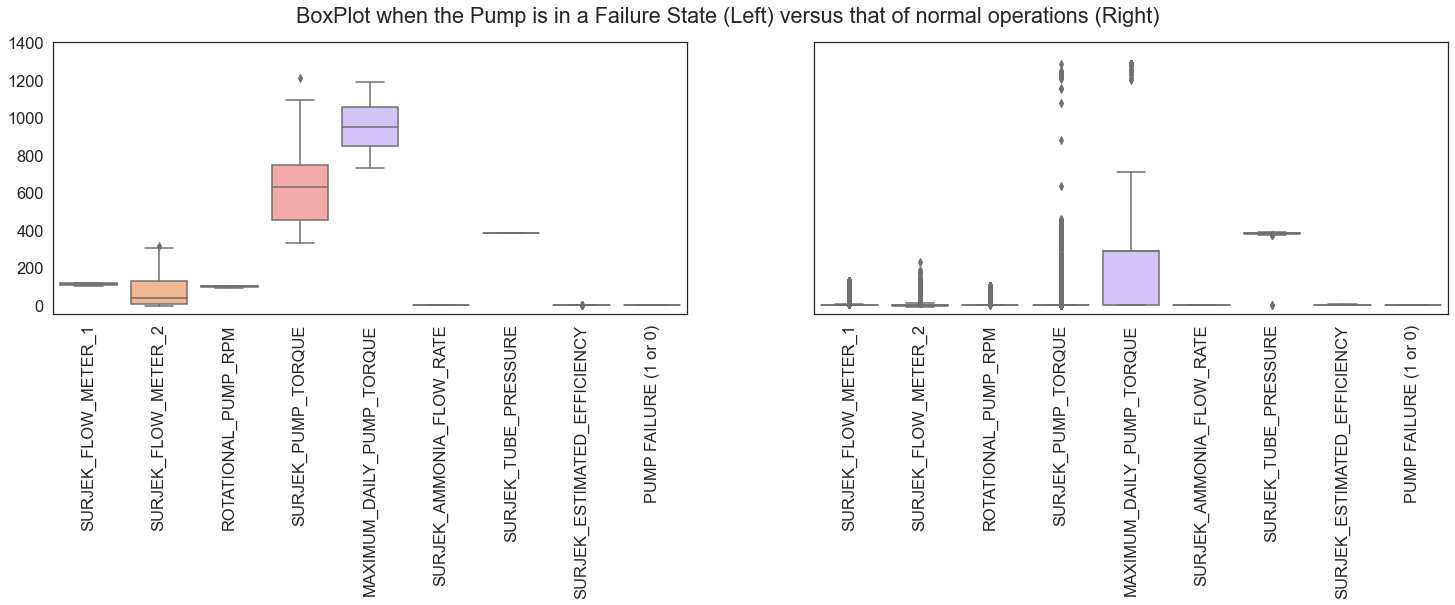

In [6]:
# Data with pump failure
df_fail = dataframe[dataframe['PUMP FAILURE (1 or 0)'] == 1]

# Subplot and figure
plt.rcParams['figure.figsize'] = (25,5)
f, axes = plt.subplots(1,2, sharey=True)
f.suptitle("BoxPlot when the Pump is in a Failure State (Left) versus that of normal operations (Right)")
bp_fail = sns.boxplot(data=df_fail, palette='pastel', ax=axes[0])

# Data without pump failure
df_no_fail = dataframe[dataframe['PUMP FAILURE (1 or 0)'] == 0]
bp_no_fail = sns.boxplot(data=df_no_fail, palette='pastel', ax=axes[1])


# Box Plot
for ax in f.axes:
    plt.sca(ax)
    plt.ylim(-50,1400)
    plt.xticks(rotation=90)
plt.show()

### From analysing the boxplots, there seem to be a number of outliers.

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

In [7]:
# Q1 of dataframe
df_q1 = dataframe.quantile(.25)

# Q3 of dataframe
df_q3 = dataframe.quantile(.75)

# IQR of dataframe
df_iqr = df_q3 - df_q1
print(df_iqr)


SURJEK_FLOW_METER_1              0.704162
SURJEK_FLOW_METER_2              5.748178
ROTATIONAL_PUMP_RPM              0.687240
SURJEK_PUMP_TORQUE               0.350032
MAXIMUM_DAILY_PUMP_TORQUE      276.315522
SURJEK_AMMONIA_FLOW_RATE         0.000000
SURJEK_TUBE_PRESSURE             3.662100
SURJEK_ESTIMATED_EFFICIENCY      1.240724
PUMP FAILURE (1 or 0)            0.000000
dtype: float64


---------------------------------------------------------------------------

### Step 7: <span style="color:green">Identify Outliers</span> 

How many outliers do you have? What will happen to your dataset if you remove them all? Let's find out!

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.

Ensure the dataframe doesn't include the attribute TIMEFRAME - if it does, drop this attribute for now.


In [8]:
# Reset and drop TIMEFRAME index for now
df_no_index = dataframe.reset_index(drop=True, inplace=False)

# Calculate how many entires in the original dataframe
entries = len(df_no_index)

#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have not removed any outliers from the dataset, we have " + str(entries) + " entries. \n") 

# Identify the number of entries after removing outliers 
df_no_o = df_no_index[~((df_no_index < (df_q1 - 1.5 * df_iqr))|(df_no_index > (df_q3 + 1.5 * df_iqr))).any(axis=1)]
entries_no_outliers = len(df_no_o)
entries_outliers = entries - entries_no_outliers

# Calculate the proportion of outliers in the dataset
outliers_prop = entries_outliers / entries

#We have provided the print line, you need to provide the calculation after the quoted text:
print ("When we have not removed any outliers from the dataset, we have " + str(entries) + " entries.")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(outliers_prop) + ".")

When we have not removed any outliers from the dataset, we have 6998 entries. 

When we have not removed any outliers from the dataset, we have 6998 entries.
The proportion of outliers which exist when compared to the dataframe are: 0.44912832237782224.


---------------------------------------------------------------------------

### Step 8: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1

ii) A boxplot when PUMP FAILURE is 0 

#### Note 1: Removing outliers is very situational and specific. Outliers can skew the dataset unfavourably; however, if you are doing a failure analysis, it is likely those outliers actually contain valuable insights you will want to keep as they represent a deviation from the norm that you'll need to understand.


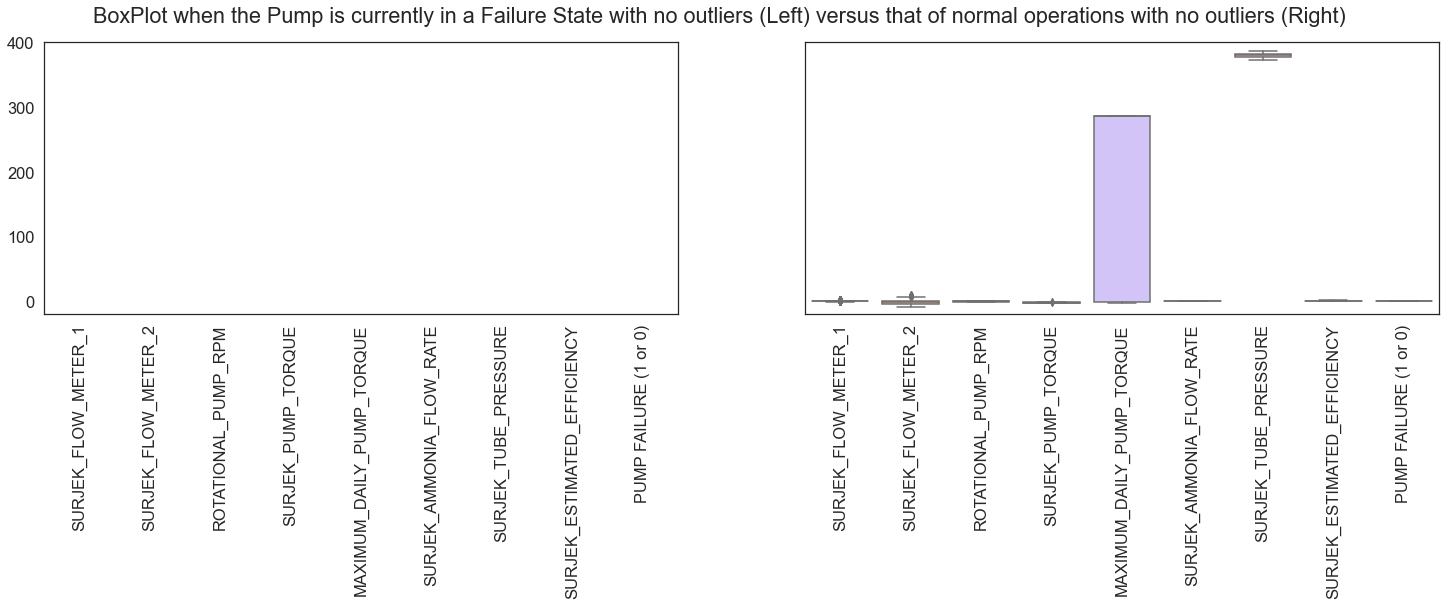

In [9]:
#Below is the first part of the code
f, axes = plt.subplots(1, 2, sharey=True)
f.suptitle("BoxPlot when the Pump is currently in a Failure State with no outliers (Left) versus that of normal operations with no outliers (Right)")
plt.rcParams['figure.figsize'] = (15,5)

# Boxplot when PUMP FAILURE is 1
df_no_o_fail = df_no_o[df_no_o['PUMP FAILURE (1 or 0)'] == 1]
bp_no_o_f = sns.boxplot(data=df_no_o_fail, palette='pastel', ax=axes[0])


# Boxplot when PUMP FAILURE is 0
df_no_o_nofail = df_no_o[df_no_o['PUMP FAILURE (1 or 0)'] == 0]
bp_no_o_nofail = sns.boxplot(data=df_no_o_nofail, palette='pastel', ax=axes[1])

# Box Plot
for ax in f.axes:
    plt.sca(ax)
    plt.ylim(-20,400)
    plt.xticks(rotation=90)
plt.show()


### Based on the boxplots created, we've come to the conclusion that, in this scenario, we actually _shouldn't_ remove the outliers, as we are attempting to understand the Pump Failure Behavior.

-----

### Step 9: <span style="color:green">Plot and Examine Each Column</span>   
Using a loop, iterate through each of the Column Names, and plot the data.

Find the minimum (min) and maximum (max) time in the dataframe. Use Tight_layout. Include a title with min and max time. 

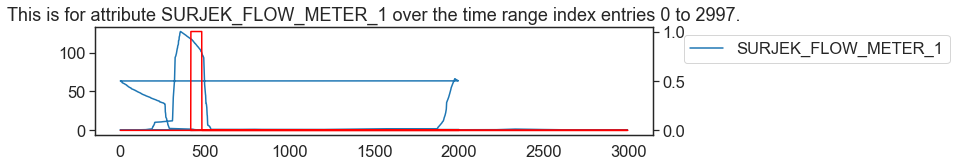

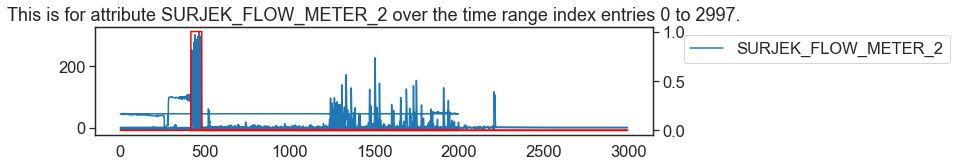

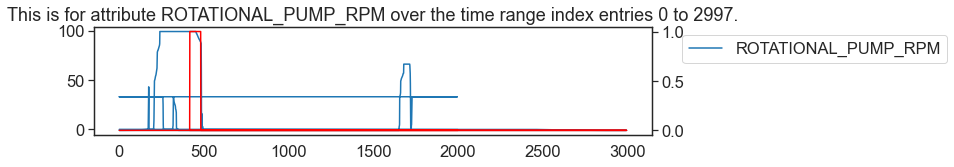

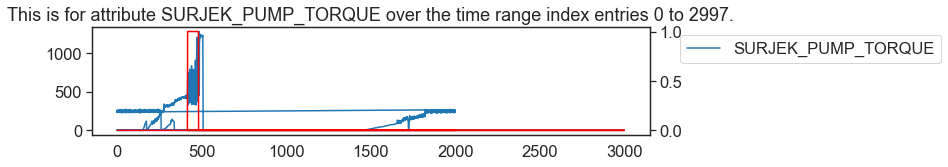

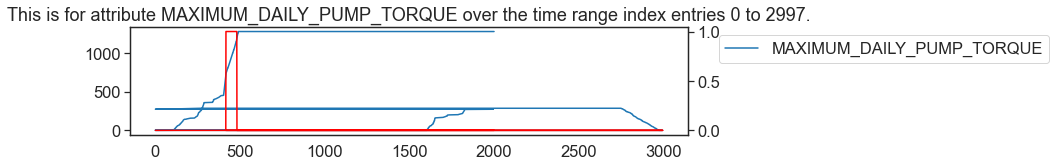

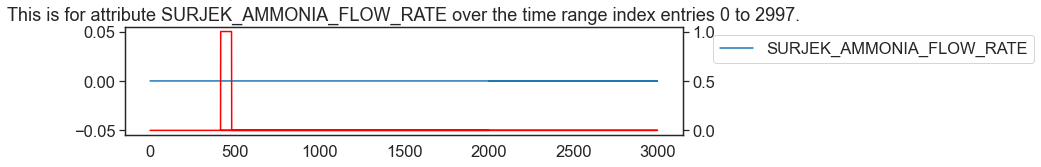

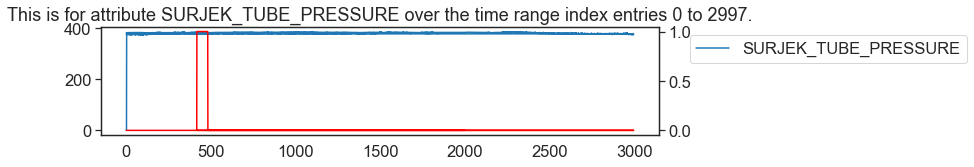

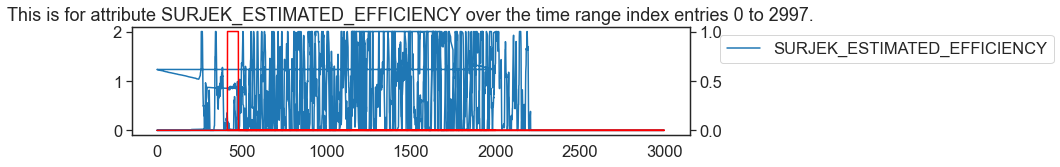

In [10]:
#Below is the first part of the code
dataframe = pd.concat(combine)
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
filt2 = ['PUMP FAILURE (1 or 0)']
colList = dataframe[filt].columns
plt.rcParams['figure.figsize'] = (10,2)
#---write your code below-------
for i in colList:
    failureState = dataframe[filt2]
    ax = dataframe[i].plot()
    ax2 = ax.twinx()
    ax2.plot(failureState, color='red')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    minTime = dataframe.index.min()
    maxTime = dataframe.index.max()
    plt.tight_layout
    plt.title("This is for attribute " + i + " over the time range index entries " + str(minTime) + " to " +
             str(maxTime) + ".")
    plt.show()


Of course, given that all the attributes have varying units, you might need more than one plot to make sense of all this data. For this next step, let's view the information by comparing the <b>ROLILNG DEVIATIONS</b> over a 30-point period.

As the deviations will likely be a lot lower, the scale should be much simpler to view on one plot.

---

### Step 10: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Re-plot all variables for the time period 12/10/2014 14:40 to 12/10/2014 14:45, focusing specifically on the first Pump “Failure”. 

**Open-ended Question:**
Do any particular variables seem to move in relation to the failure event?

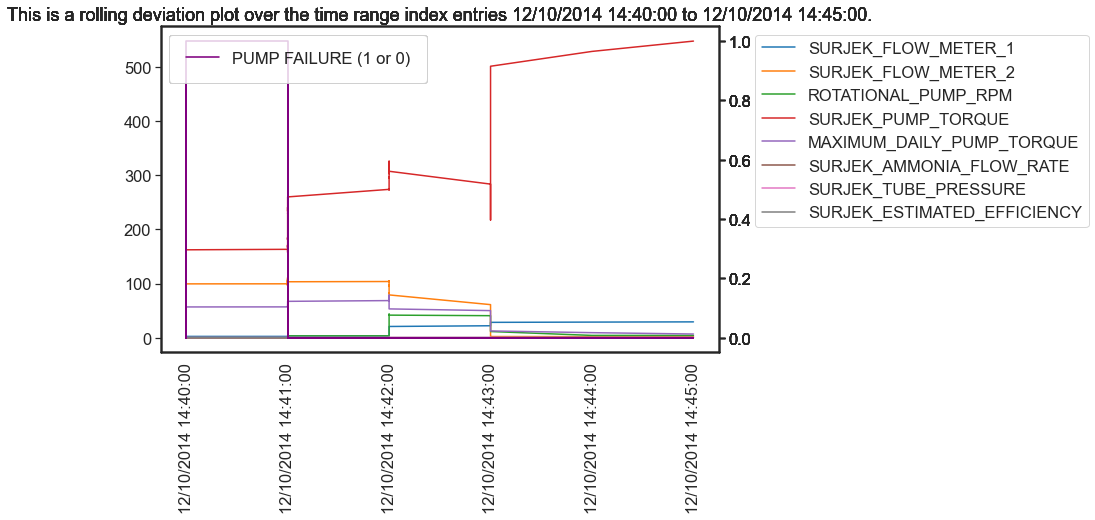

In [18]:
#Below is the first part of the code
from datetime import datetime
dataframe = pd.concat(combine)
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME']).apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S')if not pd.isnull(x) else '')
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)', 'TIMEFRAME']
filt2 = ['PUMP FAILURE (1 or 0)']
filt3 = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
colList = dataframe[filt].columns
plt.rcParams['figure.figsize'] = (10,6)
dataframe.set_index('TIMEFRAME', inplace=True)
#----write your code below-------
start_time = '12/10/2014 14:40:00'
end_time = '12/10/2014 14:45:00'

dataframe = dataframe[(dataframe.index >= start_time) & (dataframe.index <= end_time)]
rollingDF = dataframe.rolling(30).std()
colList = rollingDF[filt3].columns
rollingDF['PUMP FAILURE (1 or 0)'] == dataframe['PUMP FAILURE (1 or 0)']

fig = plt.figure()
ax = plt.axes()
date_form = mdates.DateFormatter("%d/%m/%Y %H:%M:%S")
ax.xaxis.set_major_formatter(date_form)

# Loop through the Plot
for i in colList:
    ax.plot(rollingDF.index, rollingDF[i], label=i)
    ax2 = ax.twinx()
    ax2.plot(dataframe[filt2], 'purple', label='PUMP FAILURE (1 or 0)')
    ax.xaxis.set_tick_params(rotation=90)
    plt.tight_layout
    minTime = rollingDF.index.min()
    maxTime = rollingDF.index.max()
    plt.title('This is a rolling deviation plot over the time range index entries ' + 
             str(minTime) + " to " + str(maxTime) + ".")
    ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    ax2.legend(loc='upper left', borderpad=1)
plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

### Step 11: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables (excluding those with consistent 0 values such as Ammonia Flow Rate).

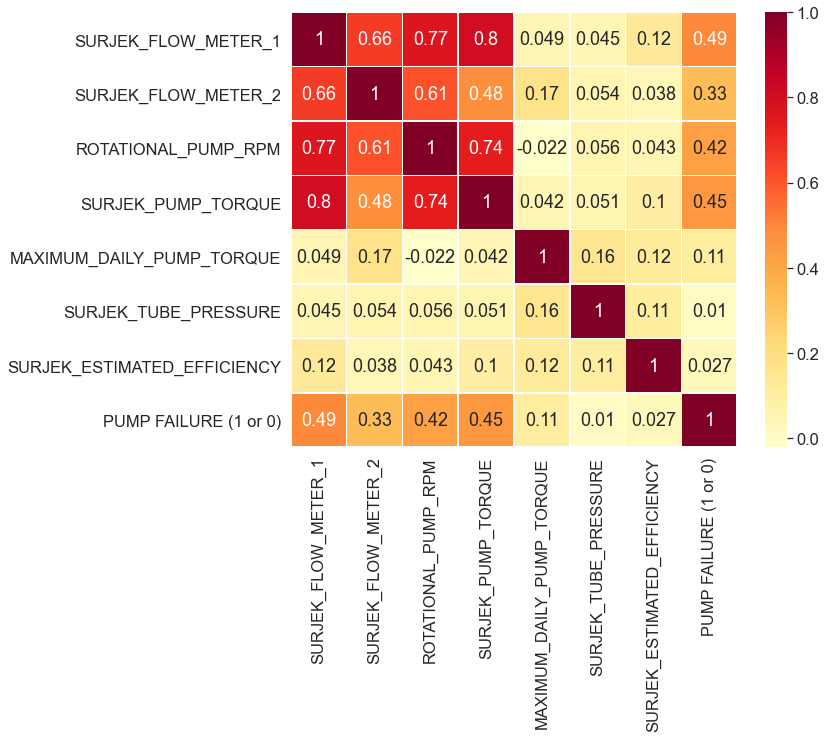

In [12]:
#Below is the first part of the code
from datetime import datetime
dataframe = pd.concat(combine)
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
dataframe.set_index('TIMEFRAME', inplace=True)

filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
dataframe = dataframe[filt]
#----write your code below--------
plt.rcParams['figure.figsize'] = (10,8)
corr = dataframe.corr(method='pearson')
sns.heatmap(corr, cmap='YlOrRd', annot=True, linewidths='.5')

**Open-ended Question:**

Which variables seem to correlate with Pump Failure?

### Step 12: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.

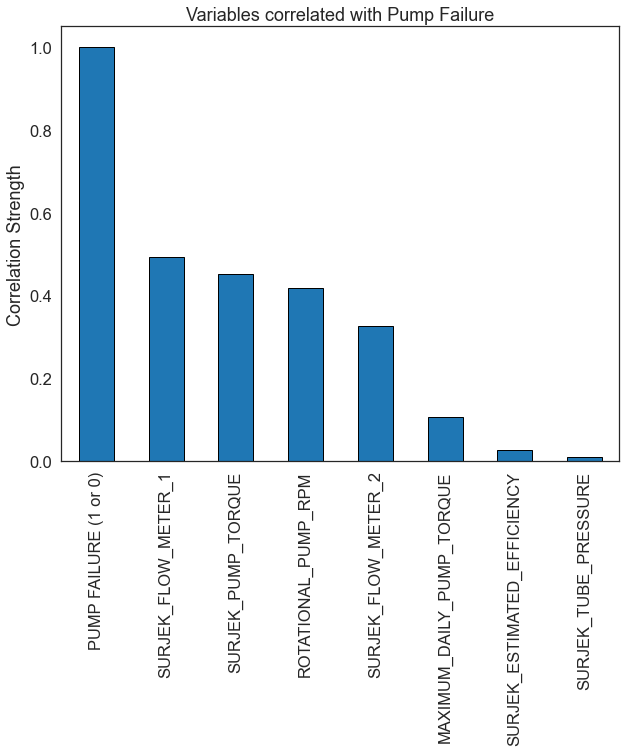

In [13]:
corr = corr.sort_values('PUMP FAILURE (1 or 0)', ascending=False)
corr['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.title('Variables correlated with Pump Failure')
plt.ylabel('Correlation Strength')
plt.show()

---

### Step 13: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, we created a correlation matrix using 'raw' variables. This time, we'll transform 'raw' variables using a rolling standard deviation. 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Using the newly created rolling standard deviation dataframe, use the Seaborn heatmap function to replot this dataframe into a heatmap.

Do any variables stand out?

## Please put your code here

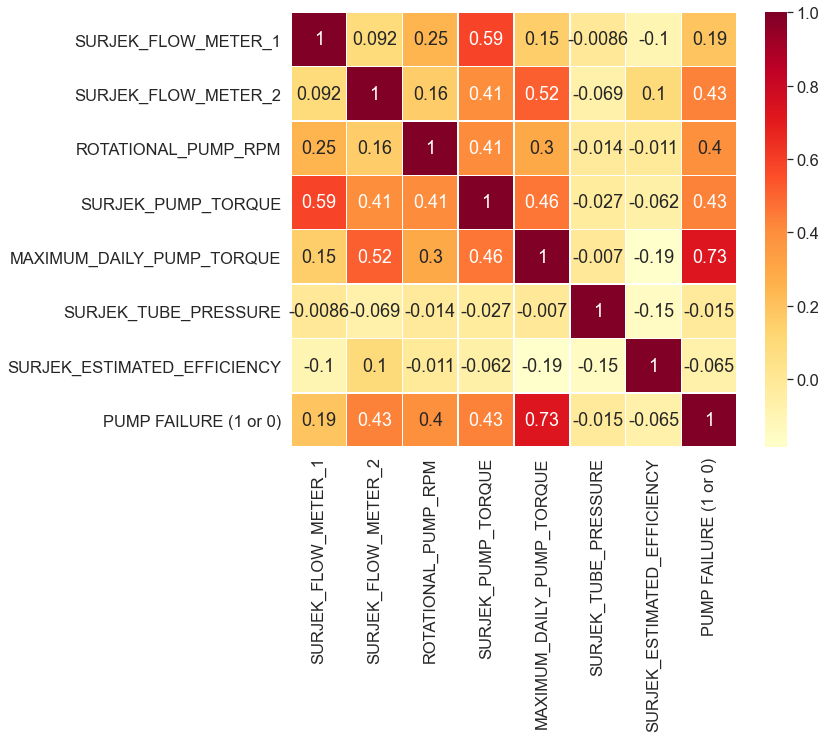

In [14]:
#Below is the first part of the code
dataframe = pd.concat(combine)
dataframe['TIMEFRAME'] = pd.to_datetime(dataframe['TIMEFRAME'], format="%d/%m/%Y %H:%M:%S", infer_datetime_format=True )
dataframe.set_index('TIMEFRAME', inplace=True)
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY','PUMP FAILURE (1 or 0)']
#----write your code below------
dataframe = dataframe[filt]
rollingDF_std = dataframe.rolling(30).std()
df_corr_std = rollingDF_std.corr(method='pearson')
sns.heatmap(df_corr_std, cmap='YlOrRd', linewidths='0.5', annot=True)

### Creating a Multivariate Regression Model


### Step 14: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0). What is the R Squared for the model and what does this signify?

ii) Repeat i) but this time use the rolling standard deviation variables you created previously. What is the R Squared for the model and what does this signify?

**Open-ended Question:**

Which linear regression model seems to be a better fit?

In [15]:
#Answer for step i): 
#Below is the first part of the code
dataframe_two = pd.concat(combine)
dependentVar = dataframe_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
#----write your code below------
df = dataframe_two[filt]
df = sm.add_constant(df)
x = df
y = dependentVar
olsmod = sm.OLS(y,x)
olsres = olsmod.fit()
print(olsres.summary())

print('\nThe R Squared for the model is ' + str(olsres.rsquared) + '.')
print('The R Squared value indicates a goodness of fit. It shows how many data points fall on the regression line. ' \
      'In this case, since we have multiple independent variables, we should rely on the adjusted R Squared for our analysis.')

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.264
Model:                               OLS   Adj. R-squared:                  0.264
Method:                    Least Squares   F-statistic:                     358.8
Date:                   Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                           23:25:34   Log-Likelihood:                 7548.9
No. Observations:                   6998   AIC:                        -1.508e+04
Df Residuals:                       6990   BIC:                        -1.503e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

/Users/gabrielcheuk/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/gabrielcheuk/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [16]:
#answer for step ii): 
#Below is the first part of the code
dataframe_two = pd.concat(combine)
dependentVar = dataframe_two['PUMP FAILURE (1 or 0)']
filt = ['SURJEK_FLOW_METER_1', 'SURJEK_FLOW_METER_2', 'ROTATIONAL_PUMP_RPM',
       'SURJEK_PUMP_TORQUE', 'MAXIMUM_DAILY_PUMP_TORQUE',
       'SURJEK_AMMONIA_FLOW_RATE', 'SURJEK_TUBE_PRESSURE',
       'SURJEK_ESTIMATED_EFFICIENCY']
#----write your code below------
rollingDF = dataframe_two.rolling(30).std()
rollingDF['PUMP FAILURE (1 or 0)'] = dependentVar
rollingDF = rollingDF.fillna(0)
x2 = rollingDF[filt]
x2 = sm.add_constant(x2)
y2 = rollingDF['PUMP FAILURE (1 or 0)']
olsmod_std = sm.OLS(y2,x2)
olsres_std = olsmod_std.fit()
print(olsres_std.summary())

print('\nThe R Squared for the medoel is '  + str(olsres_std.rsquared) + '.')
print('The R Squared value indicates a goodness of fit. It shows how many data points fall on the regression line. ' \
      'In this case, since we have multiple independent variables, we should rely on the adjusted R Squared for our analysis.')


                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.626
Model:                               OLS   Adj. R-squared:                  0.625
Method:                    Least Squares   F-statistic:                     1669.
Date:                   Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                           23:25:34   Log-Likelihood:                 9912.4
No. Observations:                   6998   AIC:                        -1.981e+04
Df Residuals:                       6990   BIC:                        -1.975e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Great job creating those regressive equations! You've reached the final step of this case study!
### Step 15: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

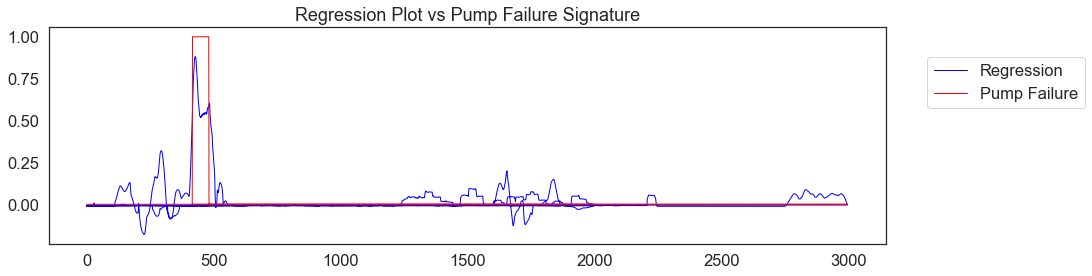

In [20]:
# Below is the first part of the code
plt.rcParams['figure.figsize'] = (15,4)
#----write your code below------
ypred = olsres_std.predict(x2)
ax = ypred.plot(color='blue', linewidth='1', label='Regression')
ax.plot(y2, color='red',linewidth='1', label='Pump Failure')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.legend(bbox_to_anchor=(1.04,.9), loc="upper left")
plt.tight_layout
plt.title('Regression Plot vs Pump Failure Signature')
plt.show()